<a href="https://colab.research.google.com/github/Deep-Learning-Challenge/challenge-notebooks/blob/master/2.Convolutional%20Neural%20Networks/2.Guided%20Projects/1.Handwritten%20Digit%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

# Handwritten Digit Recognition

A popular demonstration of the capability of deep learning techniques is object recognition in image data. The hello world of object recognition for machine learning and deep learning is the MNIST dataset for handwritten digit recognition. In this project, you will discover how to develop a deep learning model to achieve near state-of-the-art performance on the MNIST handwritten digit recognition task in Python using the Keras deep learning library. After completing this step-by-step tutorial, you will know:
* How to load the MNIST dataset in Keras and develop a baseline neural network model for the problem.
* How to implement and evaluate a simple Convolutional Neural Network for MNIST.
* How to implement a close to state-of-the-art deep learning model for MNIST.

Let's get started.

**Note**: You may want to speed up the tutorial's computation using GPU rather than CPU hardware. This is a suggestion, not a requirement. The tutorial will work just fine on the CPU.

## Handwritten Digit Recognition Dataset

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes, and Christopher Burges for evaluating machine learning models on the handwritten [digit classification problem](http://yann.lecun.com/exdb/mnist/). The dataset was constructed from a number of scanned document datasets available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modified NIST or MNIST dataset.

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with minimal data cleaning or preparation required. Each image is a 28 x 28-pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model, and a separate set of 10,000 images are used to test it.

It is a digit recognition task. As such, there are ten digits (0 to 9) or ten classes to predict. Results are reported using prediction error, which is nothing more than the inverted classification accuracy. Excellent results achieve a prediction error of less than 1%. A state-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. There is a listing of the state-of-the-art results and links to the relevant papers on the MNIST and other datasets on [Rodrigo Benenson's webpage](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html).

## Loading the MNIST dataset in Keras

The Keras deep learning library provides a convenient method for loading the MNIST dataset. The dataset is downloaded automatically the first time this function is called and is stored in your home directory in `~/.keras/datasets/mnist.pkl.gz` as a 15 megabyte file. This is very
handy for developing and testing deep learning models. To demonstrate how easy it is to load the MNIST dataset, we will first write a little script to download and visualize the first four images in the training dataset.

11493376/11490434 [==============================] - 1s 0us/step


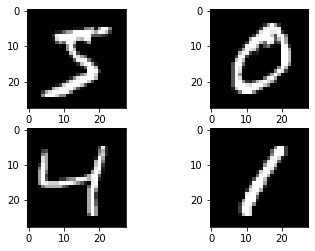

In [1]:
import tensorflow as tf

# Plot ad hoc mnist instances
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

You can see that downloading and loading the MNIST dataset is as easy as calling the `mnist.load_data()` function.

## Baseline Model with Multilayer Perceptrons

Do we need a complex model like a convolutional neural network to get the best results with MNIST? You can get good results using a straightforward neural network model with a single hidden layer. This section will create a simple Multilayer Perceptron model that achieves an error rate of approximately 1.73%. We will use this as a baseline for comparison to more complex convolutional neural network models. Let's start by importing the classes and functions we will need.

In [2]:
import numpy

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils

It is always a good idea to initialize the random number generator to a constant to ensure that your script results are reproducible.

In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Now we can load the MNIST dataset using the Keras helper function.

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The training dataset is structured as a 3-dimensional array of instances, image width, and image height. For a Multilayer Perceptron model, we must reduce the images down into a vector of pixels. In this case, the 28 x 28 sized images will be 784-pixel input vectors. We can do this transforms easily using the reshape() function on the NumPy array. The pixel values are integers, so we cast them to floating-point values to normalize them easily in the next step.

In [5]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

The pixel values are grayscale between 0 and 255. It is almost always a good idea to perform some input values scaling when using neural network models. Because the scale is well known and well behaved, we can quickly normalize the pixel values to the range 0 and 1 by dividing each value by the maximum of 255.

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, the output variable is an integer from 0 to 9. This is a multiclass classification problem. It is good practice to use the one-hot encoding of the class values, transforming the vector of class integers into a binary matrix. We can easily do this using the built-in `np_utils.to_categorical()` helper function in Keras.

In [7]:
# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We are now ready to create our simple neural network model. We will define our model in a function. This is handy if you want to extend the example later and try and get a better score.

In [8]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal',
    activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

The model is a simple neural network with one hidden layer with the same number of neurons as there are inputs (784). A rectifier activation function is used for the neurons in the hidden layer. A softmax activation function is used on the output layer to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model's output prediction. Logarithmic loss is used as the loss function (called categorical cross-entropy in Keras), and the efficient ADAM gradient descent algorithm is used to learn the weights. A summary of the network structure is provided below:

![Summary of Multilayer Perceptron Network Structure](../../images/summary_mlp.png)

We can now fit and evaluate the model. The model is fit over ten epochs with updates every 200 images. The test data is used as the validation dataset, allowing you to see the model's skill as it trains. A verbose value of 2 is used to reduce the output to one line for each training epoch. Finally, the test dataset is used to evaluate the model, and a classification error rate is printed.

Running the example might take a few minutes when run on a CPU. You should see the output below. This simple network defined in very few lines of code achieves a respectable error rate of 1.78%.

In [9]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

2021-11-01 22:53:13.683993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-01 22:53:13.684098: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-01 22:53:13.684175: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6c3a25e0cdbe): /proc/driver/nvidia/version does not exist
2021-11-01 22:53:13.685041: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-01 22:53:14.364143: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exce

Epoch 1/10
300/300 - 8s - loss: 0.2848 - accuracy: 0.9199 - val_loss: 0.1460 - val_accuracy: 0.9567
Epoch 2/10
300/300 - 4s - loss: 0.1113 - accuracy: 0.9676 - val_loss: 0.1046 - val_accuracy: 0.9691
Epoch 3/10
300/300 - 4s - loss: 0.0720 - accuracy: 0.9790 - val_loss: 0.0762 - val_accuracy: 0.9770
Epoch 4/10
300/300 - 4s - loss: 0.0490 - accuracy: 0.9861 - val_loss: 0.0702 - val_accuracy: 0.9784
Epoch 5/10
300/300 - 5s - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0626 - val_accuracy: 0.9807
Epoch 6/10
300/300 - 4s - loss: 0.0260 - accuracy: 0.9932 - val_loss: 0.0635 - val_accuracy: 0.9803
Epoch 7/10
300/300 - 6s - loss: 0.0193 - accuracy: 0.9952 - val_loss: 0.0653 - val_accuracy: 0.9798
Epoch 8/10
300/300 - 9s - loss: 0.0144 - accuracy: 0.9967 - val_loss: 0.0605 - val_accuracy: 0.9804
Epoch 9/10
300/300 - 5s - loss: 0.0102 - accuracy: 0.9981 - val_loss: 0.0592 - val_accuracy: 0.9810
Epoch 10/10
300/300 - 4s - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.0602 - val_accuracy: 0.9814

## Simple Convolutional Neural Network for MNIST

Now that we have seen how to load the MNIST dataset and train a simple Multilayer Perceptron model, it is time to develop a more sophisticated convolutional neural network or CNN model. Keras does provide a lot of capability for creating convolutional neural networks. This section will create a simple CNN for MNIST that demonstrates how to use all aspects of a modern CNN implementation, including Convolutional layers, Pooling layers, and Dropout layers. The first step is to import the classes and functions needed.

In [10]:
import numpy
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils

Again, we always initialize the random number generator to a constant seed value for reproducibility of results.

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Next, we need to load the MNIST dataset and reshape it so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions `[samples][channels][width][height]`. Note, we are forcing so-called channels-first ordering for consistency in this example. In the case of RGB, the first dimension channels would be 3 for the red, green, and blue components, and it would be like having three image inputs for every color image. In MNIST, where the channel values are grayscale, the pixel dimension is set to 1.

In [12]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples]width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

As before, it is a good idea to normalize the pixel values to the range 0 and 1, and one hot encode the output variable.

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Next, we define our neural network model. Convolutional neural networks are more complex than standard Multilayer Perceptrons, so we will start by using a simple structure, to begin with, that uses all of the elements for state-of-the-art results. Below summarizes the network architecture.

1. The first hidden layer is a convolutional layer called a Conv2D. The layer has 32 feature maps, with a size of 5 x 5 and a rectifier activation function. This is the input layer, expecting images with the structure outline above.
2. Next, we define a pooling layer that takes the maximum value called MaxPooling2D. It is configured with a pool size of 2 x 2.
3. The next layer is a regularization layer using dropout called Dropout. It is configured to randomly exclude 20% of neurons in the layer to reduce overfitting.
4. Next is a layer that converts the 2D matrix data to a vector called Flatten. It allows the output to be processed by standard fully connected layers.
5. Next, a fully connected layer with 128 neurons and rectifier activation function is used.
6. Finally, the output layer has ten neurons for the ten classes and a softmax activation function to output probability-like predictions for each class.

As before, the model is trained using logarithmic loss and the ADAM gradient descent algorithm. A depiction of the network structure is provided below.

![Summary of Convolutional Neural Network Structure](../../images/summary_cnn.png)

In [14]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

We evaluate the model the same way as before with the Multilayer Perceptron. The CNN is fit over ten epochs with a batch size of 200.

Running the example, the accuracy on the training and validation test is printed each epoch, and at the end of the classification error rate is printed. Epochs may take about 45 seconds to run on the GPU (e.g., on AWS). You can see that the network achieves an error rate of 1.20%, which is better than our simple Multilayer Perceptron model above.

In [15]:
# build the model
model = baseline_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

2021-11-01 22:54:12.709257: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
300/300 [==============================] - 40s 130ms/step - loss: 0.2478 - accuracy: 0.9286 - val_loss: 0.0888 - val_accuracy: 0.9728
Epoch 2/10
300/300 [==============================] - 33s 109ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0516 - val_accuracy: 0.9833
Epoch 3/10
300/300 [==============================] - 36s 121ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.0428 - val_accuracy: 0.9857
Epoch 4/10
300/300 [==============================] - 46s 154ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0383 - val_accuracy: 0.9870
Epoch 5/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0379 - val_accuracy: 0.9870
Epoch 6/10
300/300 [==============================] - 36s 119ms/step - loss: 0.0292 - accuracy: 0.9907 - val_loss: 0.0377 - val_accuracy: 0.9861
Epoch 7/10
300/300 [==============================] - 33s 109ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0317 - val_ac

## Larger Convolutional Neural Network for MNIST

Now that we have seen how to create a simple CNN, let's take a look at a model capable of close to state-of-the-art results. We import the classes and functions then load and prepare the data the same as in the previous CNN example. This time we define a larger CNN architecture with additional convolutional, max-pooling layers and fully connected layers. The network topology can be summarized as follows.

1. Convolutional layer with 30 feature maps of size 5 x 5.
2. Pooling layer taking the max over 2 x 2 patches.
3. Convolutional layer with 15 feature maps of size 3 x 3.
4. Pooling layer taking the max over 2 x 2 patches.
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectifier activation.
8. Fully connected layer with 50 neurons and rectifier activation.
9. Output layer.

A depiction of this larger network structure is provided below.

![Summary of the Larger Convolutional Neural Network Structure](../../images/summary_cnn_larger.png)

Like the previous two experiments, the model fits over ten epochs with a batch size of 200.

In [16]:
# define the larger model
def larger_model():
    # create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

Running the example prints accuracy on each epoch's training and validation datasets and a final classification error rate. The model takes about 60 seconds to run per epoch on a modern CPU. This slightly larger model achieves a respectable classification error rate of 1.06%.

In [17]:
# build the model
model = larger_model()

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

2021-11-01 23:00:39.850256: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
300/300 [==============================] - 45s 146ms/step - loss: 0.4067 - accuracy: 0.8716 - val_loss: 0.0829 - val_accuracy: 0.9721
Epoch 2/10
300/300 [==============================] - 39s 129ms/step - loss: 0.0992 - accuracy: 0.9695 - val_loss: 0.0518 - val_accuracy: 0.9838
Epoch 3/10
300/300 [==============================] - 40s 134ms/step - loss: 0.0742 - accuracy: 0.9773 - val_loss: 0.0432 - val_accuracy: 0.9863
Epoch 4/10
300/300 [==============================] - 41s 137ms/step - loss: 0.0584 - accuracy: 0.9818 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 5/10
300/300 [==============================] - 45s 148ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0298 - val_accuracy: 0.9898
Epoch 6/10
300/300 [==============================] - 47s 155ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0292 - val_accuracy: 0.9909
Epoch 7/10
300/300 [==============================] - 44s 146ms/step - loss: 0.0403 - accuracy: 0.9877 - val_loss: 0.0269 - val_ac

## Extension Ideas to Improve the Model

This is not an optimized network topology. Nor is this a reproduction of network topology from a recent paper. There is much opportunity for you to tune and improve upon this model. What is the best classification error rate you can achieve?

## Summary

In this lesson, you discovered the MNIST handwritten digit recognition problem and deep learning models developed in Python using the Keras library to achieve excellent results. Working through this tutorial, you learned:

* How to load the MNIST dataset in Keras and generate plots of the dataset.
* How to reshape the MNIST dataset and develop a simple but well-performing Multilayer Perceptron model for the problem.
* How to use Keras to create convolutional neural network models for MNIST.
* How to develop and evaluate larger CNN models for MNIST capable of near world-class results.